In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomForestRegressor

In [2]:
def plot_scatter(X, color, alpha=.5):
    return plt.scatter(X[:, 0], X[:, 1], c=color, alpha=alpha, edgecolor="k")

In [3]:
N_SAMPLES = 1000
RANDOM_STATE = 42

X, y = make_blobs(
    n_samples=N_SAMPLES,
    cluster_std=(1., 1., .5),
    centers=((-6, -6), (0, 0), (6, 6)),
    random_state=RANDOM_STATE
)

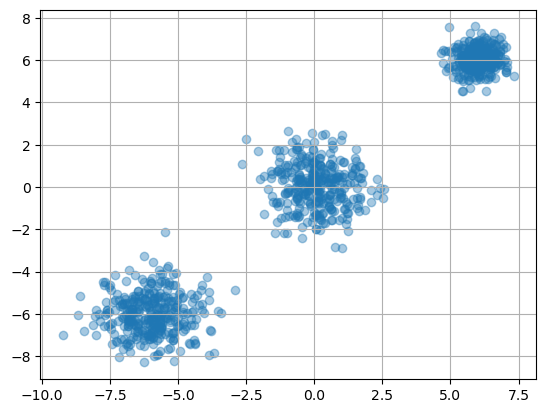

In [4]:
plt.scatter(X[:, 0], X[:, 1], alpha=.4)
plt.grid()

In [5]:
random_class = RandomForestRegressor(
    n_estimators=500,
    criterion="entropy",
    max_depth=30,
    random_state=0
)
random_class = random_class.fit(X, y)

In [6]:
random_class.predict([[7.5, -10]])

array([0])

In [7]:
label_rf = np.array([])
for _ in range(X.shape[0]):
    label_example_rf = random_class.predict([[X[_, 0], X[_, 1]]])
    label_rf = np.hstack([label_rf, label_example_rf])

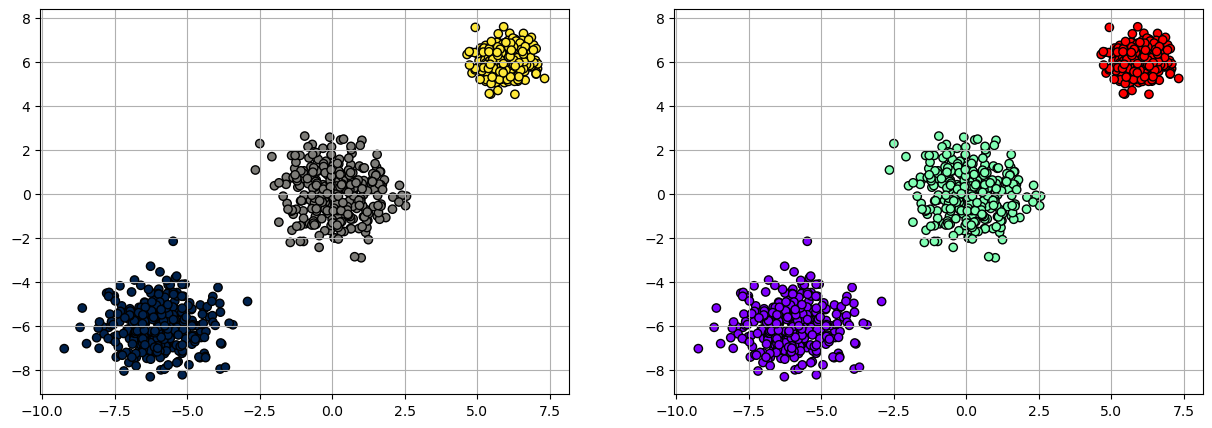

In [8]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="cividis", edgecolors="k")
ax.grid(True)
ax = fig.add_subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=label_rf, cmap="rainbow", edgecolors="k")
ax.grid(True)

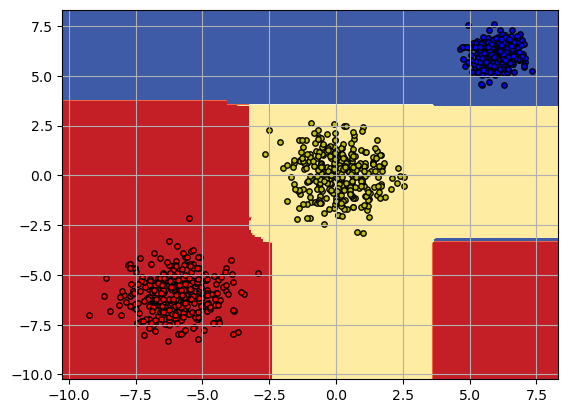

In [9]:
n_classes = 3
plot_colors = "ryb"
plot_step = .02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)
)
plt.tight_layout(h_pad=.5, w_pad=.5, pad=2.5)

Z = random_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for _, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == _)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

plt.grid()

In [10]:
random_class.predict([[0, 10]])

array([2])

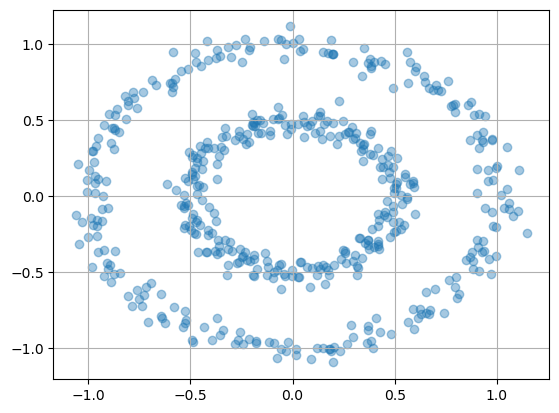

In [16]:
N_SAMPLES = 500

X_cir, y_cir = make_circles(n_samples=N_SAMPLES, factor=.5, noise=.05)
plt.scatter(X_cir[:, 0], X_cir[:, 1], alpha=.4)
plt.grid()

In [12]:
random_class_cir = RandomForestRegressor(
    n_estimators=500,
    criterion="entropy",
    max_depth=30,
    random_state=0
)
random_class_cir.fit(X_cir, y_cir)

RandomForestRegressor(criterion='entropy', max_depth=30, n_estimators=500,
                       random_state=0)

In [13]:
label_rf_cir = np.array([])
for _ in range(X_cir.shape[0]):
    label_example_rf_cir = random_class_cir.predict(
        [[X_cir[_, 0], X_cir[_, 1]]])
    label_rf_cir = np.hstack([label_rf_cir, label_example_rf_cir])

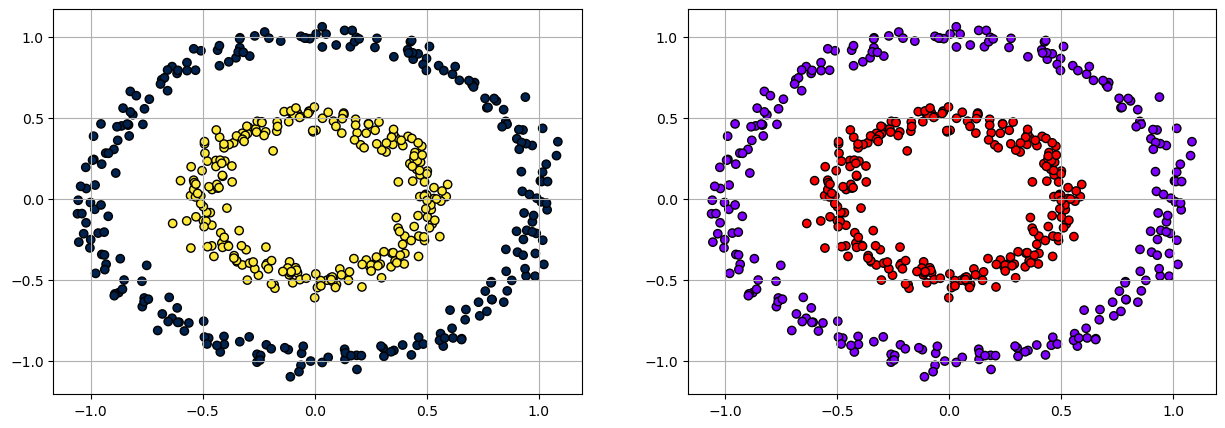

In [14]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
plt.scatter(X_cir[:, 0], X_cir[:, 1], c=y_cir, cmap="cividis", edgecolors="k")
ax.grid(True)
ax = fig.add_subplot(122)
plt.scatter(
    X_cir[:, 0],
    X_cir[:, 1],
    c=label_rf_cir,
    cmap="rainbow",
    edgecolors="k"
)
ax.grid(True)

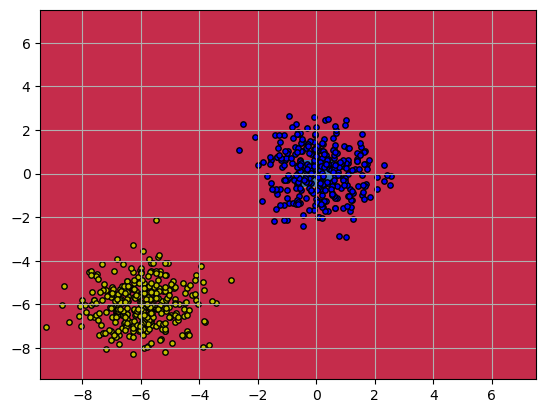

In [15]:
n_classes = 2
plot_colors = "yb"
plot_step = .02

x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 0].min() - .2, X[:, 0].max() + .2

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)
)
plt.tight_layout(h_pad=.1, w_pad=.1, pad=1.5)

Z = random_class_cir.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
for _, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == _)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        cmap="inferno",
        edgecolor="black",
        s=15,
    )

plt.grid()